## 추측통계

In [ ]:
#통계량으로 모수를 추정해서 모집단을 설명
#모집단을 잘 설명할 수 있는 표본을 잘 뽑아야 한다.


In [6]:
#모집단과 표본 
#표본 추출 방법


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('./data/ch4_scores400.csv')
df.shape
scores=np.array(df.score)
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [11]:
np.random.choice([1,2,3],3, replace=False) #1,2,3중에서 3개를 뽑아라.  replace=False ->중복이 안되게 해줌

array([2, 1, 3])

In [50]:
data=np.array([1,2,3,4,5])
p=[0.1,0.2,0.4,0.2,0.1]
sample=np.random.choice(data,size=10,replace=True,p=p) #p는 선택된 확률을 지정해주는 것.
print(sample) #어떻게 적어도 3이 가장 많이 나온다. 

[2 3 3 2 5 3 3 3 4 3]


In [18]:
np.random.seed(0)
sample=np.random.choice(scores,20)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [19]:
sample.mean() #표본의 평균

70.4

In [20]:
scores.mean() #모집단의 평균은 표본의 평균과 다름

69.53

In [22]:
for i in range(5):
    sample= np.random.choice(scores,20)
    print(sample)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균',sample.mean(),'\n')
    
    #모집단의 모평균과 표본평균은 차이가 있다. 
    #이 토드의 결과만 봐도 하나도 69.53과 같은 값이 없다. 

[ 67  76  76  64  83  67  90  96  66  65  63  78  42  58  70  74  58  67
 100  54]
1번째 무작위 추출로 얻은 표본평균 70.7 

[76 64 68 63 69 77 83 92 80 74 57 94 59 78 63 77 61 55 57 91]
2번째 무작위 추출로 얻은 표본평균 71.9 

[61 89 87 64 61 74 80 93 73 53 62 78 63 63 68 96 63 75 70 52]
3번째 무작위 추출로 얻은 표본평균 71.25 

[52 54 70 69 77 54 77 65 78 70 61 68 59 48 90 79 65 72 72 68]
4번째 무작위 추출로 얻은 표본평균 67.4 

[100  92  61  61  65  60  62  88  43  61  59  45  76  74  42  67  94  86
  72  46]
5번째 무작위 추출로 얻은 표본평균 67.7 




확률변수: 확률변수에 대응해서 확률이 있다. 
    동전던지기의 확률변수는 0과 1. 확률은 1/2 
    주사위의 확률변수는 1부터 6까지. 확률은 1/6
    확률변수 (x), 확률 (y)
    * 각각의 확률변수에 대응되는 y값의 궤적을 그린 그림 =확률분포
    어떤 데이터든 평균일 떄가 확률이 가장 높다. 
    모집단이 정규분포라고 한다면 표본의 분포도 정규분포를 따른다고 한다면 굉장히 추정하기 편하다.->모집단의 분포가 중요한 이유.
    

In [52]:
dice=[1,2,3,4,5,6]
prob=[1/21,2/21,3/21,4/21,5/21,6/21] #주사이가 왜곡이 되어 6이 될 수록 확률이 더 높다고 가정

np.random.seed(1)
num_trial=100
sample=np.random.choice(dice,num_trial,p=prob) #6이 가장 많이 나오게 된다.
#랜덤하게 뽑지만 prob의 확률을 전제하에 랜덤하게 출력
sample

array([4, 6, 1, 4, 3, 2, 3, 4, 4, 5, 4, 5, 3, 6, 1, 5, 4, 5, 2, 3, 6, 6,
       4, 5, 6, 6, 2, 1, 3, 6, 2, 4, 6, 5, 5, 4, 5, 6, 1, 6, 6, 6, 3, 6,
       2, 4, 6, 4, 4, 2, 1, 5, 3, 3, 5, 2, 5, 3, 5, 5, 2, 4, 5, 4, 2, 5,
       5, 5, 6, 5, 6, 2, 2, 6, 4, 3, 6, 4, 6, 6, 6, 5, 6, 4, 3, 6, 4, 6,
       5, 5, 2, 6, 4, 5, 4, 3, 6, 5, 1, 5])

In [54]:
#위에서 뽑은 100개로 주사위로 나올 수 있는 빈도를 구해봄.

freq,_=np.histogram(sample,bins=6, range=(1,7))
print(freq,'\n')
rdf=pd.DataFrame({'frequency':freq,
                 'relative frequency':freq/num_trial},
                index=pd.Index(np.arange(1,7),name='dice'))
rdf #설정한 확률로 나오지 않았음.

[ 6 12 12 20 24 26] 



,frequency,relative frequency
dice,,
1,6,0.06
2,12,0.12
3,12,0.12
4,20,0.20
5,24,0.24
6,26,0.26


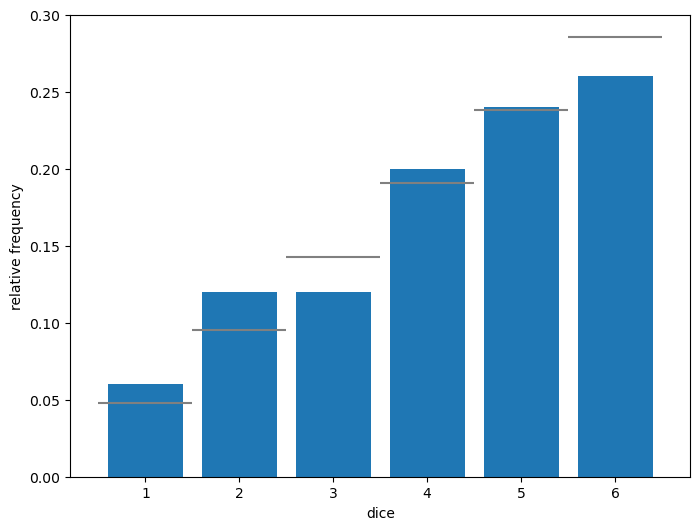

In [60]:

np.linspace(1.5,6.5,6) #1.5,6.5를 6개 사이에 
np.random.seed(1)
num_trial=100
sample=np.random.choice(dice,num_trial,p=prob)

plt.figure(figsize=(8,6))
plt.hist(sample,bins=6, range=(1,7), density=True, rwidth=0.8)
plt.hlines(prob,np.arange(1,7),np.arange(2,8), colors='gray') #1과2 3과 4,5와6,7과8 이렇게 순차적으로 그래프가 붙는다는 뜻
plt.xticks(np.linspace(1.5,6.5,6),np.arange(1,7)) # x,x_labels
# plt.xtickables(np.arange(1,7))
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.show()

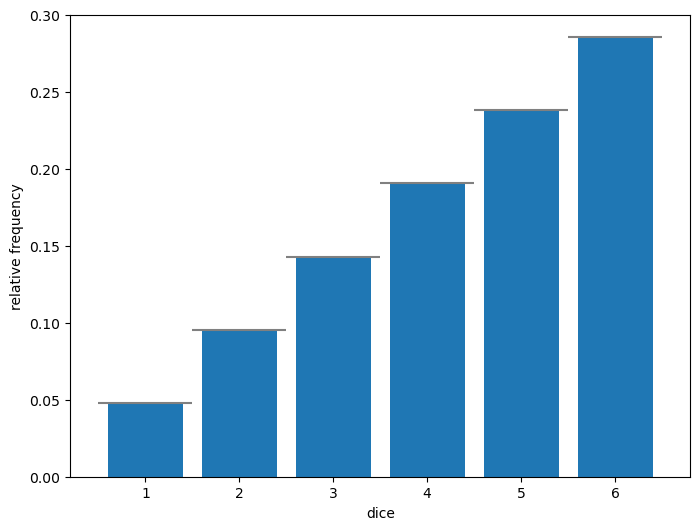

In [63]:
# 1000000번 시행하여 얻은 눈의 상대도수로부터 추측된 확률분포는 실제 확률분포와 근접
#시행횟 수를 늘리면 상대도수는 확률분포를 수렴한다. 
#= 위와 같은 식에 샘플수가 많으니까 맞아떨어짐 
# 랜덤이기 때문에 시행횟수가 적으면 오차발생율이 높아짐

np.linspace(1.5,6.5,6) 
np.random.seed(1)
num_trial=1000000 #샘플갯수
sample=np.random.choice(dice,num_trial,p=prob)

plt.figure(figsize=(8,6))
plt.hist(sample,bins=6, range=(1,7), density=True, rwidth=0.8)
#density는 히스토그램의 y축 값을 상대빈도로 나타내는지 아니면 실제 빈도로 나타내는지 설정하는 데 사용. 
#이 예제에서는 상대빈도로 나타내도록 설정
#rwidth는 각 막대의 너비를 설정

plt.hlines(prob,np.arange(1,7),np.arange(2,8), colors='gray') 
plt.xticks(np.linspace(1.5,6.5,6),np.arange(1,7)) 
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.show()

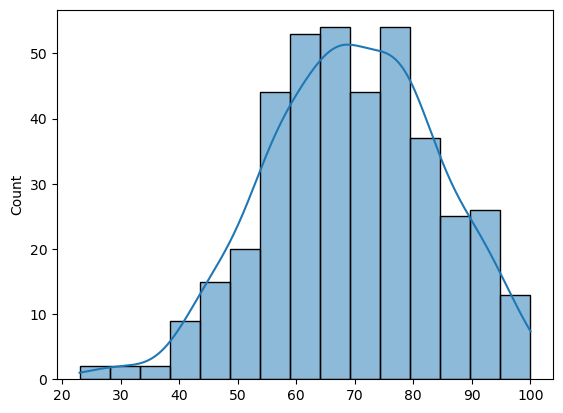

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('./data/ch4_scores400.csv')
df.shape
scores=np.array(df.score)
sns.histplot(scores,kde=True)
plt.show()

In [68]:
scores.shape

(400,)

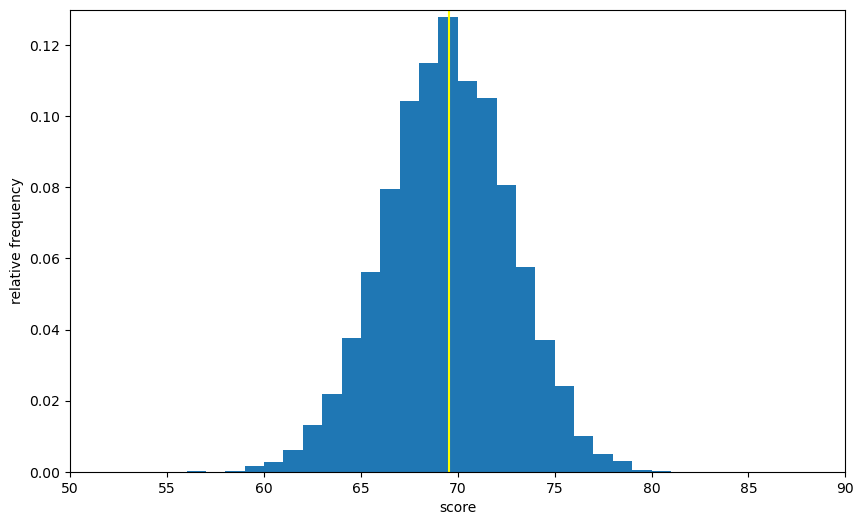

In [73]:
#표본의 평균이 어떤 분포를 이루는지 본다
#표본평균은 모평균을 중심으로 분포하는 것을 확인.
#무작위 추출에 의한 표본평균으로 모평균을 추측할 수 있는 근거가 된다. 근거가 어떻게 나오는지 찾는게 중요
#scorse 를 모집단으로 둠
sample_means=[np.random.choice(scores,20).mean() for _ in range(10000)] #샘플사이즈 20개를 만개 뽑아서 평균구하고 sample_means에 저장
len(sample_means)

fig=plt.figure(figsize=(10,6))
plt.hist(sample_means,bins=100,range=(0,100),density=True)

#모평균을 세로선으로 표시.  표본평균과 모평균 비교
plt.vlines(np.mean(scores),0,1,'yellow')
plt.axis([50,90,0,0.13]) #50.90은 x축 범위. 0,0.13은 y축 범위
plt.xlabel('score')
plt.ylabel('relative frequency')
plt.show()

#히스토그램을 1만개의 표본평균 분포
#모평균(모집단)을 중심으로 정규분포를 그리고 있다. 

확률의 수학적 정의와 의미
- 표본공간 과 확률표본
 * 확률표본 또는 표본은 풀고자 하는 문제에서 발생할 수 있는 하나의 현상 혹은 선택될 수 있는 하나의 경우를 말한다.
 * 표본공간은 가능한 모든 표본의 집합을 말하며 고려하는 범위에서 어떤 표본(경우, 현상)이 가능하고 어떤 표본이 가능하지 않은가를 정의하는 작업. 표본공간 = {H,T}, (표본 : H(동전의 앞면), T(동전의 뒷면))
 * 사건은 표본공간의 부분집합, 즉 전체 표본공간 중에서 관심을 가지는 일부 표본의 집합
 
확률
- 확률이란 사건(부분집합)을 입력하면 숫자(확률값)가 출력되는 함수
- 모든 각각의 사건(부분집합)에 어떤 숫자를 할당하는 함수
- 확률은 표본이 아닌 사건을 입력으로 가지는 함수

확률의 의미
- 빈도주의 관점 : 반복적으로 선택된 표본이 사건(부분집합) A의 원소가 될 경향. 동전을 던져 앞면이 나오는 사건의 확률값은 0.5
- 베이지안 관점 : 선택된 표본이 특정한 사건(부분집합)에 속한다는 가설,명제 혹은 주장의 신뢰도로 반복이라는 개념은 사용되지 않음. 새가 날수 있는 가능성은 95%. '앞면이 나왔다'는 주장의 신뢰도가 0.5%
 * 베이지안 확률론에서 사건이 일어났다 혹은 발생했다하는 말은 그 사건의 원소 중에 정말로 선택된 표본이 있다는 사실을 알게 되었다는 것을 말한다.
 
확률의 성질
- 공집합의 확률 : 공집합인 사건의 합은 0이다. P(0) = 0
- 여집합의 확률 : 어떤 사건의 여집합인 사건의 확률은 1 - 원래 사건의 확률 과 같다. (나머지 '여')
- 포함-배제 원리 : 두 사건의 합집합의 확률은 각 사건의 확률의 합에서 두 사건의 교집합의 확률을 뺀 것과 같다.
- 전체 확률의 법칙 : 생일이 1월인 남자라는 사건의 확률과 생일이 2월인 남자라는 사건의 확률, 이외에도 각각의 월을 생일로 가지는 남자라는 사건들의 확률을 모두 합하면 남자라는 사건의 확률이 된다. 각각의 월에 있는 남자의 생일이 서로 공통 원소가 없음

확률분포함수
- 확률이 어디에 어느 정도 분포되어 있는지를 수학적으로 명시하고 전달하는 도구
- 만약 표본의 개수가 무한하다면 현실적으로 모든 사건을 하나 하나 기술하는 것은 불가능하며 확률분포함수를 이용하여 이 문제를 해결
 * 확률질량함수 : 유한 개의 사건이 존재하는 경우 각 단수사건에 대한 확률만 정의하는 함수
 * 누적분포함수 : 시작점을 모두 또같이 음의 무한대로 통일한 특수한 구간을 사용하는 사건의 확률분포를 묘사하는 함수 
 * 확률밀도함수 : 누적분포함수를 미분하여 구한 도함수를 의미하며 특정한 구간의 확률이 다른 구간에 비해 상대적으로 얼마나 높은가를 나타내는 것이며 그 값 자체가 확률은 아니다.

확률변수
 - 확률적인 숫자 값을 출력하는 변수

#### 추측통계
확률을 사용하여 모집단의 통계적 성질을 추측하는 기법(=표본의 통계를 이용해 모수를 추측)

[모집단 분포와 표본분포]  

- 모집단: 어떤 통계적 실험의 대상이 되는 모든 대상물. (평균을 중심으로 한 정규분포)
    - ex. 대한민국 모든 남성의 키 데이터, 2018 수능점수 데이터 
- 모집단 분포: 모집단은 데이터 집단이므로 어떠한 분포를 이루며 이 데이터가 이루는 확률 분포가 모집단 분포
- 모수: 모집단의 특성을 나타내는 수치로 모평균,모분산,모표준편차,모비율,모상관관계 등  
  수능점수 전체데이터를 알고 싶은 것이 아니라 전체 수능점수 평균, 표준편차를 알고 싶어한다.
  수능점수와 달리 일반적으로 대부분의 모집단 분포는 완전하게 알려진 것이 없으며 전수조사는 경제적, 공간적, 시간적 제약으로 인해 거의 불가능
- 표본: 모집단의 모수(특성)을 알기 위하여 표본을 추출해서 모집단의 모수를 추정
- 확률표본:  모집단을 구성하는 모든 구성원이 표본으로 뽑힐 확률을 동일하게 하여 추출한 표본. Random이란 무작위라는 의미로, 어떠한 의도를 가지지 않는다는 것을 의미하며, 모든 구성원이 뽑힐 확률이 동일하다는 개념. 
- 통계량: 확률표본의 특성을 설명하는 값으로 표본평균, 표본분산, 표본표준편차, 표본비율, 표본상관관계 등  
  모수는 모집단이 변하지 않기 때문에 그 값이 변하지 않으나 통계량은 표본을 어떻게 추출하느냐에 따라서 그 값이 다르게 나타난다.
- 확률변수: 무작위 실험을 했을 때 특정 확률로 발생하는 각각의 결과를 수치값으로 표현한 변수. 동전의 앞과 뒤
- 확률분포: 확률변수 X의 모든 값과 그 에 대응하는 확률값들의 분포. 동전의 앞 0.5, 뒤 0.5 
- 무작위로 표본 30개씩 반복해서 100번 추출하면 100번 추출한 표본 30개의 평균값들을 100개 구할 수 있다. 추출된 표본들의 각 평균값들에 대한 발생 분포를 그려보면 특정 확률변수에 대응하는 확률을 가진 확률 분포를 그릴 수 있다. 이것을 통계량의 확률분포라고 할 수 있고 이를 표본분포라고 부른다. 
- ☆☆☆통계량이 '확률 변수'라는 의미: 확률변수의 확률분포가 수학적으로 설명가능한 분포(예, 정규분포)를 따른다고 하면 특정 확률변수와 확률함수를 알고 있다면 특정 사건이 일어날 확률을 계산할 수 있으며 더 나아가 모수와 통계량의 관계를 알고 있다면 그것을 통해 모수에 대한 통계적인 추정을 할 수 있다. 즉 통계량의 확률 함수 또는 표본 분포를 안다고 가정하면 이를 이용해 모수를 추정할 수 있다.

[표본통계량 성질]

- 샘플사이즈가 크면 표본평균은 모평균에 가까워진다.
- 샘플사이즈가 커질수록 표본평균의 표준편차가 작아짐. 샘플사이즈를 크게 하면 흩어짐이 적은 신뢰할 수 있는 표본평균을 얻을 수 있다.
- 표준오차는이론상 표본평균의 표준편차 크기인데 샘플사이즈가 커지면 표준오차는 작아짐 
- 모분산은 0.64, 표본분산의 평균값은 0.575로 분산이 과소평가되어짐 
    -> 불편분산을 사용(모집단에서 표본 뽑아서 쓰는 경우만 사용.), 편향을 제거(ddof =1)
- 샘플사이즈가 커질수록 불편분산은 모분산(0.64)에 가까워짐
- 불편성 : 추정량의 기댓값이 진짜 모수(모집단의 파라미터)가 되는 특성. <<편향이 없는 추정량>>
- 일치성 : 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성
- 표본평균과 불편분산은 둘다 불편성을 가지고 있다고 할 수 있다.
- 샘플사이즈를 크게 하면 표본평균은 모평균에 가까워지고 불편분산은 모분산에 가까워지므로 일치성을 가짐
- 큰수의 법칙 : 표본의 크기가 커지면 표본평균이 모평균에 가까워지는 방법을 표현한 법칙
- 중심극한정리 ★ : 모집단분포가 무엇이든지간에 샘플사이즈가 커지면 표본 평균들이 이루는 분포가 모집단의 평균μ, 표준편차σ/sqrt(n)인 정규분포에 가까워진다는 정리  (모집단 분포가 정규분포가 아니어도 마찬가지)
  https://drhongdatanote.tistory.com/57 

[표본분산이 분산을 과소평가하는 이유]

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 (모분산 계산): np.sum((fish_data - mu)**2)/N  여기에 루트씌우면 표준편차<br>
호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
샘플링 3마리 {1,2,3} 표본평균 2  
이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [76]:
#평균이 4, 표준편차가 0.8인 정규분포에서 10개의 샘플 추출

from scipy import stats
population = stats.norm(loc=4,scale=0.8)
#population #정규분포 객체 생성. 
population.rvs(size=10) #정규분포에서 10개의 샘플을 뽑아줌.

array([4.63614802, 4.07561579, 4.49919044, 4.14353278, 3.46389867,
       3.23401235, 3.95649151, 3.88575285, 5.25531286, 3.62979694])

In [79]:
#표본의 평균으로 이루어진 배열 만들기
sample_mean_array=np.zeros(10000)
print(sample_mean_array[:10])
for i in range(10000):
    sample_mean_array[i]=population.rvs(size=10).mean()  #샘플사이즈 10개인 샘플 뽑은것의 평균 추출
sample_mean_array[:10] #추출값= 표본평균

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([4.04301782, 3.89635135, 4.06089018, 4.49045039, 3.87502292,
       3.45637803, 4.10411038, 3.98880096, 3.64785895, 3.72440206])

In [80]:
#표본평균의 평균
#sample_mean_array :표본평균의 배열
sample_mean_array.mean().round(2)  

4.0

In [92]:
#표본평균의 표준편차
sample_mean_array.std(ddof=1).round(2)


SyntaxError: invalid syntax (21557801.py, line 1)

<AxesSubplot:ylabel='Count'>

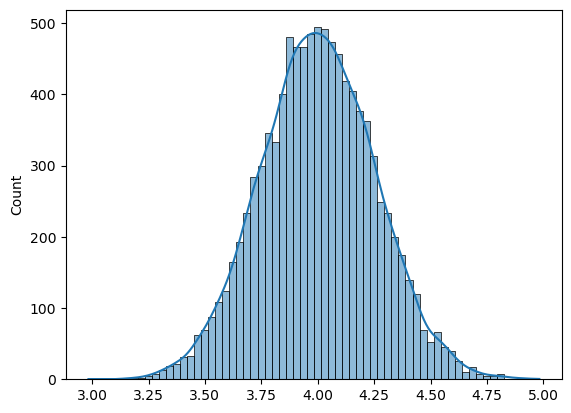

In [83]:
sns.histplot(sample_mean_array,kde=True)

In [89]:
#샘플사이즈 변화 
size_array= np.arange(10,100100,100) #10~100000까지 100단위로 출력
size_array[:10]

array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])

In [87]:
sample_mean_array_size=np.zeros(len(size_array))
len(sample_mean_array_size)

1001

In [88]:
#샘플사이즈를 변화시키면서 표본평균을 도출하는 시뮬레이션
np.random.seed(1)
for i in range(0,len(size_array)):
    sample=population.rvs(size=size_array[i])
    sample_mean_array_size[i]=np.mean(sample)
sample_mean_array_size[:10]

#array([3.92228729 (10), 4.0383612 (110), 4.09185254 (210), 4.01346562 (310), 4.0047295 ,
#      4.05765729, 3.98466861, 3.99126955, 3.98909837, 4.03638272]) 등등등 
#array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910]) 이 위치에 있는 것들

array([3.92228729, 4.0383612 , 4.09185254, 4.01346562, 4.0047295 ,
       4.05765729, 3.98466861, 3.99126955, 3.98909837, 4.03638272])

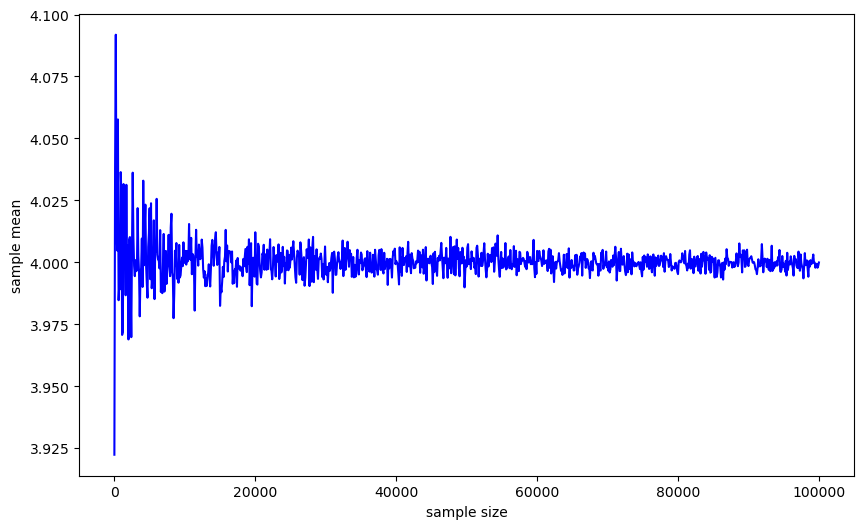

In [90]:
plt.figure(figsize=(10,6))
plt.plot(size_array,sample_mean_array_size,color='b')
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.show()
#샘플 사이즈가 커질수록 표본평균이 모평균(4)에 가까워짐

In [91]:
#사용자함수 (표본평균 계산)

def cal_sample_mean(size,n_trial):
    sample_mean_array=np.zeros(n_trial)
    for i in range(n_trial):
        sample_mean_array[i]=population.rvs(size=size).mean()
    return sample_mean_array #표본평균분포를 반환
np.mean(cal_sample_mean(size=10,n_trial=10000))

4.001728724963021

## [과제2_0411]
상기 사용자 함수를 사용하여 샘플사이즈가 10,20,30 이고 샘플갯수가 각각 10000개인 3개의 데이터프레임을 생성 후 결합한 후 바이올린 플롯을 그려서 인사이트를 기술하세요